# *신경망 학습*

## 4. 기울기

> - 편미분에서 변수 별로 따로 미분을 계산
- 모든 변수의 편미분을 계산해 벡터로 **정리**한 것을 **Gradient(기울기)**라고 명명
$$(\frac{\delta f}{\delta x_0},\frac{\delta f}{\delta x_1})$$
___

In [1]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # return np.sum(x**2)

In [2]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  #x와 같은 형상의 배열 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        #f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        #f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val #값 복원
        
    return grad

- np.zeros_like()으로 반환 할 배열 생성
- for문으로 반환 할 배열에 들어갈 값을 계산해서 순차적으로 반환


- (3,4), (0,2), (3,0) 각 세점에서의 기울기 산출

In [53]:
numerical_gradient(function_2, np.array([3,4], dtype = float))

array([6., 8.])

In [54]:
numerical_gradient(function_2, np.array([0,2], dtype = float))

array([0., 4.])

In [55]:
numerical_gradient(function_2, np.array([3,0], dtype = float))

array([6., 0.])

- 위 각 기울기의 의미는 다음 그림으로 이해 가능

No handles with labels found to put in legend.


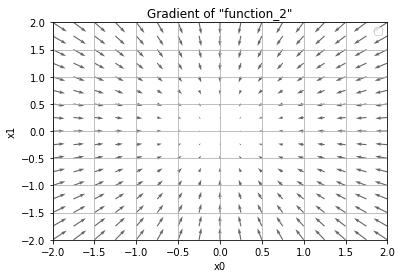

In [3]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.title('Gradient of "function_2"')
    plt.show()


- 위 그림에서 화살표가 꼭 가장 낮은 장소를 가르킨다고 할 수는 없음
- 하지만 기울기가 가리키는 쪽은 **각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향** (손실함수를 가장 크게 줄이는 방향?)
___

### 1) 경사법(경사 하강법)
- 기계학습 문제는 학습 가운데 최적의 매개변수(손실함수가 최소)를 찾아야 함
- 다만, 문제는 어디가 최소인지 짐작하기란 쉽지 않음
- 이를 해결하기 위한 방법으로 고안된 것이 기울기를 이용해 손실함수의 최소값을 찾으려는 **경사법**임
- 경사법은 현 위치에서 기울기를 산출하여 기울어진 방향으로 이동하는 것을 반복하는 방법임
- 하지만 함수가 복잡할수록, 기울기가 0인 지점이 최소값이 아닐 가능성이 다분함

- 경사법을 수식으로 나타내면 아래와 같음
$$x_0 = x_0 - \eta\frac{\delta f}{\delta x_0}$$
$$x_1 = x_1 - \eta\frac{\delta f}{\delta x_1}$$

- **$\eta$ (eta, 에타)**는 신경망에서 **learning rate(학습률)**라고 하며, 매개변수 값을 얼마나 갱신할지 정하는 수치임
- 여러차례 학습률 만큼 반복해가며 최적의 매개변수 값을 찾는 것이 목표
- 학습률 값이 너무 크면 기울기가 낮은 값을 찾기 어려우며, 학습률 값이 너무 작으면 엉뚱한 곳에서 최적의 값을 찾고 있을 수 있음
- 경사 하강법은 아래와 같이 구현 가능

In [4]:
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    
    return x

- 좌표를 나타내는 x 배열을 입력 받고,
- x 배열의 편미분을 구해 각각의 기울기를 구하고,
- 각각의 기울기에 학습률을 곱하여 얼마나 움직일지 정하고,
- x배열의 좌표로부터 이동
- 이 과정을 step_num 만큼 수행

<br>
- 예제) 경사법으로 $f(x_0,\ x_1) = x_0^2 + x_1^2$의 최소값을 구하라

In [65]:
init_x = np.array([-3, 4], dtype = np.float)
gradient_descent(function_2, init_x, lr = 0.1)

array([-6.11110793e-10,  8.14814391e-10])

In [66]:
init_x = np.array([7, 3], dtype = np.float)
gradient_descent(function_2, init_x, lr = 0.1)

array([1.42592518e-09, 6.11110793e-10])

In [67]:
init_x = np.array([100, 5], dtype = np.float)
gradient_descent(function_2, init_x, lr = 0.1)

array([2.03703598e-08, 1.01851799e-09])

- 위 세 예제를 보면 각각 (-3, 4), (7, 3), (100, 5)를 초기값으로 경사법을 사용해 최소값을 탐색하여 (0, 0)과 거의 다를 것 없는 결과 산출
- 갱신 과정을 그림으로 나타내면 다음과 같음

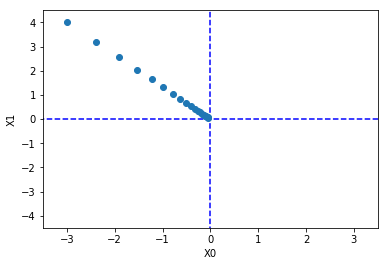

In [112]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


- 위에서 생성한 새로운 gradient_descent 함수는 이동 경로를 저장하여 보여줌

In [118]:
init_x = np.array([-3.0, 4])
[int(i) for i in gradient_descent(function_2, init_x, lr = 10)[0]]

[-25898374737328, -1295248616896]

In [119]:
init_x = np.array([-3.0, 4])
[int(i) for i in gradient_descent(function_2, init_x, lr = 1e-10)[0]]

[-2, 3]

- 학습률이 너무 크면, 큰 값으로 발산
- 학습률이 너무 작으면 갱신률 미비

- 학습률 같은 매개변수를 **hyper parameter(하이퍼파라미터)**라고 함
- 가중치와 편향 같은 경우 훈련데이터와 학습데이터에 의해 **자동으로 획득**되는 매개변수임
- 학습률 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수로, 여러 값들을 시험해 보고 학습값을 찾는 과정이 필요
___

### 2) 신경망에서의 기울기
- 신경망에서도 기울기를 구해야 하며, 이는 가중치 매개변수에 대한 손실함수의 기울기임
- 예를 들어 형상이 2x3, 가중치가 $W$, 손실함수가 $L$인 신경망에서 경사는 $\frac{\delta L}{\delta W}$로 표현 가능

$$
W = \left(\begin{array}{ll}w_{11} & w_{12} & w_{13}\\ w_{21} & w_{22} & w_{23}\end{array}\right)
$$
$$
\frac{\delta L}{\delta W} = \left(\begin{array}{cc} \frac{\delta L}{\delta w_{11}} & \frac{\delta L}{\delta w_{12}} & \frac{\delta L}{\delta w_{13}} \\ \frac{\delta L}{\delta w_{21}} & \frac{\delta L}{\delta w_{22}} & \frac{\delta L}{\delta w_{23}} \end{array}\right)
$$

- $\frac{\delta L}{ \delta w}$의 각 원소는 각각의 원소에 대한 편미분임
- i.e. 1행 1번째 원소인 $\frac{\delta L}{\delta w_{11}}$은 $w_{11}$을 조금 변경했을 때, 손실함수 $L$이 얼마나 변화하는지 그 기울기를 의미함
- 중요한 점은 $W$와 $\frac{\delta L}{\delta W}$의 형상이 같다는 것

- *간단한 신경망을 예로 들어 실제로 기울기를 구하는 코드*

In [6]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from data.functions import softmax, cross_entropy_error
from data.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

- 여기서는 softmax, cross_entropy_error, numerical_gradient 메서드를 이용
- simpleNet 클래스는 형상이 2X3인 가중치 매개변수를 하나의 인스턴스 변수로 갖음 simpleNet().W
- 예측을 수행하는 predict(x)와, 손실함수의 값을 구하는 loss(x,t) 메스드를 보유 (x = 입력데이터, t = 정답 레이블)

- 예측을 수행하고 손실함수의 값을 구했으니, 기울기를 구해 어떻게 $W$를 갱신할지 정리 할 필요가 있음
- numerical_gradient$(f,x)$를 사용해서 기울기 계산

In [35]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.08864938 -0.11601889  0.02736951]
 [ 0.13297407 -0.17402833  0.04105427]]


- $f$는 $W$(net.W)를 인수로 받아 손실함수를 계산
- dW는 numerical_gradient(f, netW)의 결과로 형상은 2X3의 2차원 배열임

- 이를 해석하자면 $\frac{\delta L}{\delta w_{11}}$은 0.08이며 $w_{11}$을 $h$만큼 증가시키면 $0.08h$만큼 손실함수가 증가
- $\frac{\delta L}{\delta w_{12}}$은 -0.11이며 $w_{12}$을 $h$만큼 증가시키면 $0.11h$만큼 손실함수가 감소
- 따라서 $w_{11}$은 음의 방향으로, $w_{12}$는 양의 방향으로 갱신해야 하며, $w_{12}$가 기여도가 더 높음

In [36]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.08864938 -0.11601889  0.02736951]
 [ 0.13297407 -0.17402833  0.04105427]]


- 참고로 간단한 함수는 lambda 기법으로 함수를 구현하는게 더 편함
___